## 인천시 구별 주유소 가격

In [1]:
from selenium import webdriver # 경로명 user부분 사용자 계정명으로 변경 주의!
driver = webdriver.Chrome(r"C:\Users\minye\Downloads\chromedriver_win32\chromedriver.exe")

C:\Users\minye\AppData\Local\Temp\ipykernel_13808\1021579741.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(r"C:\Users\minye\Downloads\chromedriver_win32\chromedriver.exe")


In [20]:
main_url = "https://www.opinet.co.kr/user/main/mainView.do"
driver.get(main_url)
url = "https://www.opinet.co.kr/searRgSelect.do"
driver.get(url)

In [21]:
city_xpath= '//*[@id="SIDO_NM0"]'
driver.find_element("xpath",city_xpath).send_keys('인천')

In [6]:
gu_xpath = '//*[@id="SIGUNGU_NM0"]'
driver.find_element("xpath",gu_xpath).send_keys('연수구')

In [7]:
search_button = '//*[@id="searRgSelect"]'
driver.find_element("xpath",search_button).click()

In [22]:
save_excel_button='//*[@id="glopopd_excel"]'
driver.find_element("xpath",save_excel_button).click()

In [9]:
from selenium import webdriver

opts = webdriver.ChromeOptions()
opts.add_experimental_option('prefs',{
    'download.default_directory':r"C:\Users\minye\Exercises\Week10"
})

driver = webdriver.Chrome(r"C:\Users\minye\Downloads\chromedriver_win32\chromedriver.exe",options = opts)

C:\Users\minye\AppData\Local\Temp\ipykernel_13808\2850619066.py:8: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(r"C:\Users\minye\Downloads\chromedriver_win32\chromedriver.exe",options = opts)


## 인천시 모든 구 정보 가져오기

In [19]:
from selenium import webdriver

opts = webdriver.ChromeOptions()
opts.add_experimental_option('prefs',{
    'download.default_directory':r"C:\Users\minye\Exercises\Week10"
})

driver = webdriver.Chrome(r"C:\Users\minye\Downloads\chromedriver_win32\chromedriver.exe",options = opts)

C:\Users\minye\AppData\Local\Temp\ipykernel_13808\2853461327.py:8: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(r"C:\Users\minye\Downloads\chromedriver_win32\chromedriver.exe",options = opts)


In [14]:
main_url = "https://www.opinet.co.kr/user/main/mainView.do"
driver.get(main_url)
url = "https://www.opinet.co.kr/searRgSelect.do"
driver.get(url)

In [15]:
city_xpath= '//*[@id="SIDO_NM0"]'
driver.find_element("xpath",city_xpath).send_keys('인천')

In [16]:
gu_xpath = '//*[@id="SIGUNGU_NM0"]'
gu_list_raw = driver.find_element("xpath", gu_xpath)
gu_list = gu_list_raw.find_elements("tag name","option")
for g in gu_list:
    print(g.text)


시/군/구
강화군
계양구
남동구
동구
미추홀구
부평구
서구
연수구
옹진군
중구


In [17]:
gu_names = []
for i in range(len(gu_list)):
    if i > 0:
        gu_names.append(gu_list[i].text)
print(gu_names)

['강화군', '계양구', '남동구', '동구', '미추홀구', '부평구', '서구', '연수구', '옹진군', '중구']


In [18]:
pip install --upgrade ipywidgets

ERROR: Could not install packages due to an OSError: [WinError 32] 다른 프로세스가 파일을 사용 중이기 때문에 프로세스가 액세스 할 수 없습니다: 'c:\\users\\minye\\anaconda3\\share\\jupyter\\nbextensions\\jupyter-js-widgets\\extension.js'
Consider using the `--user` option or check the permissions.




  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.5.2
    Uninstalling widgetsnbextension-3.5.2:


In [23]:
import time
from tqdm.notebook import tqdm
for i in tqdm(range(len(gu_names))):
    print(gu_names[i])
    #지역 연수구
    driver.find_element("xpath", '//*[@id="SIGUNGU_NM0"]').send_keys(gu_names[i])
    
    time.sleep(1)
    # 조회버튼 클릭하기
    driver.find_element("xpath", '//*[@id="searRgSelect"]').click()
    
    time.sleep(1)
    # 엑셀저장 버튼 클릭하기
    driver.find_element("xpath", '//*[@id="glopopd_excel"]').click()
    
    time.sleep(1)
    

  0%|          | 0/10 [00:00<?, ?it/s]

강화군
계양구
남동구
동구
미추홀구
부평구
서구
연수구
옹진군
중구


In [25]:
driver.close()

## 주유소

In [26]:
pip install xlrd

In [10]:
from glob import glob

In [35]:
station_files = glob('지역*.xls')
station_files

['지역_위치별(주유소) (1).xls',
 '지역_위치별(주유소) (2).xls',
 '지역_위치별(주유소) (3).xls',
 '지역_위치별(주유소) (4).xls',
 '지역_위치별(주유소) (5).xls',
 '지역_위치별(주유소) (6).xls',
 '지역_위치별(주유소) (7).xls',
 '지역_위치별(주유소) (8).xls',
 '지역_위치별(주유소) (9).xls',
 '지역_위치별(주유소).xls']

In [13]:
import pandas as pd

tmp_list = []

for file_name in station_files:
    tmp = pd.read_excel(file_name, header=2)
    tmp_list.append(tmp)
    
tmp_list[0]

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,인천광역시,선학현대주유소,인천 연수구 경원대로 539 (선학동),현대오일뱅크,032-812-5144,Y,1798,1568,1833,-
1,인천광역시,아시아self주유소 인천점,인천 연수구 한나루로 131 (옥련동),SK에너지,032-859-5151,Y,-,1568,1833,-
2,인천광역시,크로바주유소,인천 연수구 한나루로 92 (옥련동),S-OIL,032-834-8500,Y,-,1568,1833,1600
3,인천광역시,연수하이웨이주유소,인천 연수구 매소홀로 710 (선학동),현대오일뱅크,032-434-5189,Y,1797,1584,1881,-
4,인천광역시,송도하이웨이주유소,인천 연수구 비류대로 199,현대오일뱅크,032-832-6111,Y,1798,1587,1883,-
5,인천광역시,선학제일주유소,인천 연수구 경원대로 554 (선학동),S-OIL,032-433-5188,Y,-,1597,1987,-
6,인천광역시,지에스칼텍스(주)선학로주유소,인천 연수구 경원대로 515 (선학동),GS칼텍스,032-815-5189,N,1789,1604,1899,1610
7,인천광역시,로드801 주식회사,인천광역시 연수구 아암대로 801,현대오일뱅크,032-813-2000,Y,1837,1627,1917,1550
8,인천광역시,송도신도시주유소,인천 연수구 아암대로 809,GS칼텍스,032-858-8912,N,1837,1627,1897,-
9,인천광역시,(주)서해에너지,인천 연수구 경원대로 536 (선학동),SK에너지,032-822-8858,Y,-,1629,1899,-


In [14]:
stations = pd.concat(tmp_list)
stations.shape

(622, 10)

In [15]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 622 entries, 0 to 16
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      622 non-null    object
 1   상호      622 non-null    object
 2   주소      622 non-null    object
 3   상표      622 non-null    object
 4   전화번호    622 non-null    object
 5   셀프여부    622 non-null    object
 6   고급휘발유   622 non-null    object
 7   휘발유     622 non-null    object
 8   경유      622 non-null    object
 9   실내등유    622 non-null    object
dtypes: object(10)
memory usage: 53.5+ KB


In [16]:
stations.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,인천광역시,선학현대주유소,인천 연수구 경원대로 539 (선학동),현대오일뱅크,032-812-5144,Y,1798,1568,1833,-
1,인천광역시,아시아self주유소 인천점,인천 연수구 한나루로 131 (옥련동),SK에너지,032-859-5151,Y,-,1568,1833,-
2,인천광역시,크로바주유소,인천 연수구 한나루로 92 (옥련동),S-OIL,032-834-8500,Y,-,1568,1833,1600
3,인천광역시,연수하이웨이주유소,인천 연수구 매소홀로 710 (선학동),현대오일뱅크,032-434-5189,Y,1797,1584,1881,-
4,인천광역시,송도하이웨이주유소,인천 연수구 비류대로 199,현대오일뱅크,032-832-6111,Y,1798,1587,1883,-


In [17]:
stations_sel = stations.loc[:,['상호','주소','상표','셀프여부','휘발유']]
stations_sel

,상호,주소,상표,셀프여부,휘발유
0,선학현대주유소,인천 연수구 경원대로 539 (선학동),현대오일뱅크,Y,1568
1,아시아self주유소 인천점,인천 연수구 한나루로 131 (옥련동),SK에너지,Y,1568
2,크로바주유소,인천 연수구 한나루로 92 (옥련동),S-OIL,Y,1568
3,연수하이웨이주유소,인천 연수구 매소홀로 710 (선학동),현대오일뱅크,Y,1584
4,송도하이웨이주유소,인천 연수구 비류대로 199,현대오일뱅크,Y,1587
...,...,...,...,...,...
12,지에스칼텍스(주)연수시티주유소,인천 연수구 먼우금로 200 (연수동),GS칼텍스,Y,1659
13,지에스칼텍스(주)송도국제도시주유소,인천 연수구 하모니로 128 (송도동),GS칼텍스,Y,1660
14,원천제3주유소,인천 연수구 비류대로 223,GS칼텍스,Y,1698
15,송화주유소,인천 연수구 앵고개로 121 (동춘동),SK에너지,N,1699


In [18]:
stations_sel.columns = ['주유소','주소','상표','셀프여부','가격']
stations_sel

,주유소,주소,상표,셀프여부,가격
0,선학현대주유소,인천 연수구 경원대로 539 (선학동),현대오일뱅크,Y,1568
1,아시아self주유소 인천점,인천 연수구 한나루로 131 (옥련동),SK에너지,Y,1568
2,크로바주유소,인천 연수구 한나루로 92 (옥련동),S-OIL,Y,1568
3,연수하이웨이주유소,인천 연수구 매소홀로 710 (선학동),현대오일뱅크,Y,1584
4,송도하이웨이주유소,인천 연수구 비류대로 199,현대오일뱅크,Y,1587
...,...,...,...,...,...
12,지에스칼텍스(주)연수시티주유소,인천 연수구 먼우금로 200 (연수동),GS칼텍스,Y,1659
13,지에스칼텍스(주)송도국제도시주유소,인천 연수구 하모니로 128 (송도동),GS칼텍스,Y,1660
14,원천제3주유소,인천 연수구 비류대로 223,GS칼텍스,Y,1698
15,송화주유소,인천 연수구 앵고개로 121 (동춘동),SK에너지,N,1699


In [19]:
# '연수구'와 같은 군/구 정보만 추출하기
# '인천 계양구 벌말로 295' -> '계양구'

gu_list  = []

for address in stations['주소']:
    address_gu = address.split()[1]
    gu_list.append(address_gu)
    
stations_sel['군/구'] = gu_list
stations_sel

,주유소,주소,상표,셀프여부,가격,군/구
0,선학현대주유소,인천 연수구 경원대로 539 (선학동),현대오일뱅크,Y,1568,연수구
1,아시아self주유소 인천점,인천 연수구 한나루로 131 (옥련동),SK에너지,Y,1568,연수구
2,크로바주유소,인천 연수구 한나루로 92 (옥련동),S-OIL,Y,1568,연수구
3,연수하이웨이주유소,인천 연수구 매소홀로 710 (선학동),현대오일뱅크,Y,1584,연수구
4,송도하이웨이주유소,인천 연수구 비류대로 199,현대오일뱅크,Y,1587,연수구
...,...,...,...,...,...,...
12,지에스칼텍스(주)연수시티주유소,인천 연수구 먼우금로 200 (연수동),GS칼텍스,Y,1659,연수구
13,지에스칼텍스(주)송도국제도시주유소,인천 연수구 하모니로 128 (송도동),GS칼텍스,Y,1660,연수구
14,원천제3주유소,인천 연수구 비류대로 223,GS칼텍스,Y,1698,연수구
15,송화주유소,인천 연수구 앵고개로 121 (동춘동),SK에너지,N,1699,연수구


In [20]:
# 군/구 목록 확인
stations_sel['군/구'].unique()

array(['연수구', '강화군', '계양구', '남동구', '동구', '미추홀구', '남구', '부평구', '서구', '옹진군',
       '중구'], dtype=object)

In [21]:
# 예외 처리하기
stations_sel.query("가격 == '-'")

,주유소,주소,상표,셀프여부,가격,군/구
29,에스지씨솔루션㈜ 인천1지점,인천 미추홀구 아암대로253번길 14,GS칼텍스,N,-,미추홀구
30,태하셀프주유소,인천 미추홀구 한나루로 459 (용현동),SK에너지,Y,-,미추홀구
38,동일석유(주)성신주유소,인천 중구 인중로 154,SK에너지,N,-,중구
29,에스지씨솔루션㈜ 인천1지점,인천 미추홀구 아암대로253번길 14,GS칼텍스,N,-,미추홀구
30,태하셀프주유소,인천 미추홀구 한나루로 459 (용현동),SK에너지,Y,-,미추홀구


In [22]:
# 가격이 기입되어 있지 않은 주유소 제외하기
stations_sel = stations_sel.query("가격 != '-'")
stations_sel

,주유소,주소,상표,셀프여부,가격,군/구
0,선학현대주유소,인천 연수구 경원대로 539 (선학동),현대오일뱅크,Y,1568,연수구
1,아시아self주유소 인천점,인천 연수구 한나루로 131 (옥련동),SK에너지,Y,1568,연수구
2,크로바주유소,인천 연수구 한나루로 92 (옥련동),S-OIL,Y,1568,연수구
3,연수하이웨이주유소,인천 연수구 매소홀로 710 (선학동),현대오일뱅크,Y,1584,연수구
4,송도하이웨이주유소,인천 연수구 비류대로 199,현대오일뱅크,Y,1587,연수구
...,...,...,...,...,...,...
12,지에스칼텍스(주)연수시티주유소,인천 연수구 먼우금로 200 (연수동),GS칼텍스,Y,1659,연수구
13,지에스칼텍스(주)송도국제도시주유소,인천 연수구 하모니로 128 (송도동),GS칼텍스,Y,1660,연수구
14,원천제3주유소,인천 연수구 비류대로 223,GS칼텍스,Y,1698,연수구
15,송화주유소,인천 연수구 앵고개로 121 (동춘동),SK에너지,N,1699,연수구


In [23]:
price_list = []

for price in stations_sel['가격']:
    price_new = int(price)
    price_list.append(price_new)
    
stations_sel['가격'] = price_list
stations_sel

C:\Users\SH501\AppData\Local\Temp\ipykernel_10300\1987852061.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stations_sel['가격'] = price_list


,주유소,주소,상표,셀프여부,가격,군/구
0,선학현대주유소,인천 연수구 경원대로 539 (선학동),현대오일뱅크,Y,1568,연수구
1,아시아self주유소 인천점,인천 연수구 한나루로 131 (옥련동),SK에너지,Y,1568,연수구
2,크로바주유소,인천 연수구 한나루로 92 (옥련동),S-OIL,Y,1568,연수구
3,연수하이웨이주유소,인천 연수구 매소홀로 710 (선학동),현대오일뱅크,Y,1584,연수구
4,송도하이웨이주유소,인천 연수구 비류대로 199,현대오일뱅크,Y,1587,연수구
...,...,...,...,...,...,...
12,지에스칼텍스(주)연수시티주유소,인천 연수구 먼우금로 200 (연수동),GS칼텍스,Y,1659,연수구
13,지에스칼텍스(주)송도국제도시주유소,인천 연수구 하모니로 128 (송도동),GS칼텍스,Y,1660,연수구
14,원천제3주유소,인천 연수구 비류대로 223,GS칼텍스,Y,1698,연수구
15,송화주유소,인천 연수구 앵고개로 121 (동춘동),SK에너지,N,1699,연수구


In [24]:
stations_sel = stations_sel.query("가격 != '-'").copy() # 경고 해결하기
stations_sel

,주유소,주소,상표,셀프여부,가격,군/구
0,선학현대주유소,인천 연수구 경원대로 539 (선학동),현대오일뱅크,Y,1568,연수구
1,아시아self주유소 인천점,인천 연수구 한나루로 131 (옥련동),SK에너지,Y,1568,연수구
2,크로바주유소,인천 연수구 한나루로 92 (옥련동),S-OIL,Y,1568,연수구
3,연수하이웨이주유소,인천 연수구 매소홀로 710 (선학동),현대오일뱅크,Y,1584,연수구
4,송도하이웨이주유소,인천 연수구 비류대로 199,현대오일뱅크,Y,1587,연수구
...,...,...,...,...,...,...
12,지에스칼텍스(주)연수시티주유소,인천 연수구 먼우금로 200 (연수동),GS칼텍스,Y,1659,연수구
13,지에스칼텍스(주)송도국제도시주유소,인천 연수구 하모니로 128 (송도동),GS칼텍스,Y,1660,연수구
14,원천제3주유소,인천 연수구 비류대로 223,GS칼텍스,Y,1698,연수구
15,송화주유소,인천 연수구 앵고개로 121 (동춘동),SK에너지,N,1699,연수구


In [25]:
price_list = []

for price in stations_sel['가격']:
    price_new = int(price)
    price_list.append(price_new)
    
stations_sel['가격'] = price_list
stations_sel

,주유소,주소,상표,셀프여부,가격,군/구
0,선학현대주유소,인천 연수구 경원대로 539 (선학동),현대오일뱅크,Y,1568,연수구
1,아시아self주유소 인천점,인천 연수구 한나루로 131 (옥련동),SK에너지,Y,1568,연수구
2,크로바주유소,인천 연수구 한나루로 92 (옥련동),S-OIL,Y,1568,연수구
3,연수하이웨이주유소,인천 연수구 매소홀로 710 (선학동),현대오일뱅크,Y,1584,연수구
4,송도하이웨이주유소,인천 연수구 비류대로 199,현대오일뱅크,Y,1587,연수구
...,...,...,...,...,...,...
12,지에스칼텍스(주)연수시티주유소,인천 연수구 먼우금로 200 (연수동),GS칼텍스,Y,1659,연수구
13,지에스칼텍스(주)송도국제도시주유소,인천 연수구 하모니로 128 (송도동),GS칼텍스,Y,1660,연수구
14,원천제3주유소,인천 연수구 비류대로 223,GS칼텍스,Y,1698,연수구
15,송화주유소,인천 연수구 앵고개로 121 (동춘동),SK에너지,N,1699,연수구


In [26]:
stations_sel.reset_index(inplace=True)
stations_sel

,index,주유소,주소,상표,셀프여부,가격,군/구
0,0,선학현대주유소,인천 연수구 경원대로 539 (선학동),현대오일뱅크,Y,1568,연수구
1,1,아시아self주유소 인천점,인천 연수구 한나루로 131 (옥련동),SK에너지,Y,1568,연수구
2,2,크로바주유소,인천 연수구 한나루로 92 (옥련동),S-OIL,Y,1568,연수구
3,3,연수하이웨이주유소,인천 연수구 매소홀로 710 (선학동),현대오일뱅크,Y,1584,연수구
4,4,송도하이웨이주유소,인천 연수구 비류대로 199,현대오일뱅크,Y,1587,연수구
...,...,...,...,...,...,...,...
612,12,지에스칼텍스(주)연수시티주유소,인천 연수구 먼우금로 200 (연수동),GS칼텍스,Y,1659,연수구
613,13,지에스칼텍스(주)송도국제도시주유소,인천 연수구 하모니로 128 (송도동),GS칼텍스,Y,1660,연수구
614,14,원천제3주유소,인천 연수구 비류대로 223,GS칼텍스,Y,1698,연수구
615,15,송화주유소,인천 연수구 앵고개로 121 (동춘동),SK에너지,N,1699,연수구


In [27]:
del stations_sel['index']
stations_sel

,주유소,주소,상표,셀프여부,가격,군/구
0,선학현대주유소,인천 연수구 경원대로 539 (선학동),현대오일뱅크,Y,1568,연수구
1,아시아self주유소 인천점,인천 연수구 한나루로 131 (옥련동),SK에너지,Y,1568,연수구
2,크로바주유소,인천 연수구 한나루로 92 (옥련동),S-OIL,Y,1568,연수구
3,연수하이웨이주유소,인천 연수구 매소홀로 710 (선학동),현대오일뱅크,Y,1584,연수구
4,송도하이웨이주유소,인천 연수구 비류대로 199,현대오일뱅크,Y,1587,연수구
...,...,...,...,...,...,...
612,지에스칼텍스(주)연수시티주유소,인천 연수구 먼우금로 200 (연수동),GS칼텍스,Y,1659,연수구
613,지에스칼텍스(주)송도국제도시주유소,인천 연수구 하모니로 128 (송도동),GS칼텍스,Y,1660,연수구
614,원천제3주유소,인천 연수구 비류대로 223,GS칼텍스,Y,1698,연수구
615,송화주유소,인천 연수구 앵고개로 121 (동춘동),SK에너지,N,1699,연수구


In [38]:
pip install matplotlib

     ---------------------------------------- 7.2/7.2 MB 4.4 MB/s eta 0:00:00
     -------------------------------------- 163.6/163.6 kB 9.6 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 7.1 MB/s eta 0:00:00
     ------------------------------------- 965.4/965.4 kB 10.2 MB/s eta 0:00:00
     ---------------------------------------- 55.3/55.3 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


<AxesSubplot: title={'center': '가격'}, xlabel='셀프여부'>

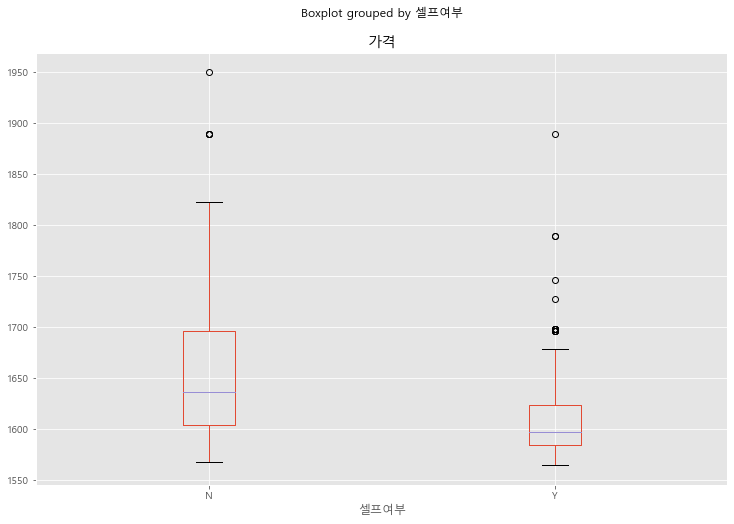

In [40]:
import matplotlib.pyplot as plt

plt.rc('font',family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.style.use("ggplot")

stations_sel.boxplot(column='가격',by='셀프여부',figsize=(12,8))

In [42]:
pip install seaborn

     ------------------------------------ 288.2/288.2 kB 808.1 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


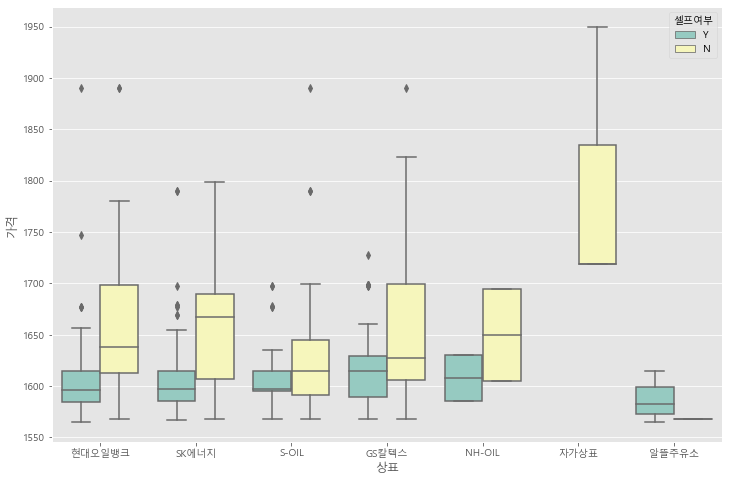

In [43]:
import seaborn as sns

plt.figure(figsize=(12,8))
sns.boxplot(x='상표',y="가격",hue='셀프여부',data = stations_sel,palette="Set3")
plt.show()

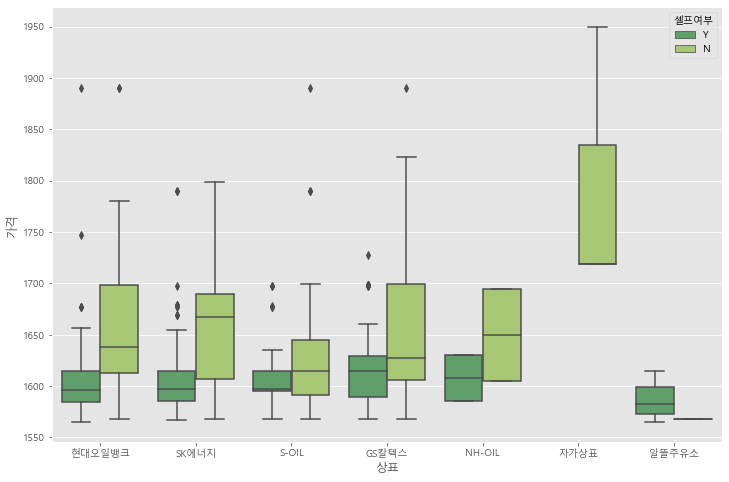

In [44]:
import seaborn as sns

plt.figure(figsize=(12,8))
sns.boxplot(x='상표',y="가격",hue='셀프여부',data = stations_sel,palette="summer")
plt.show()

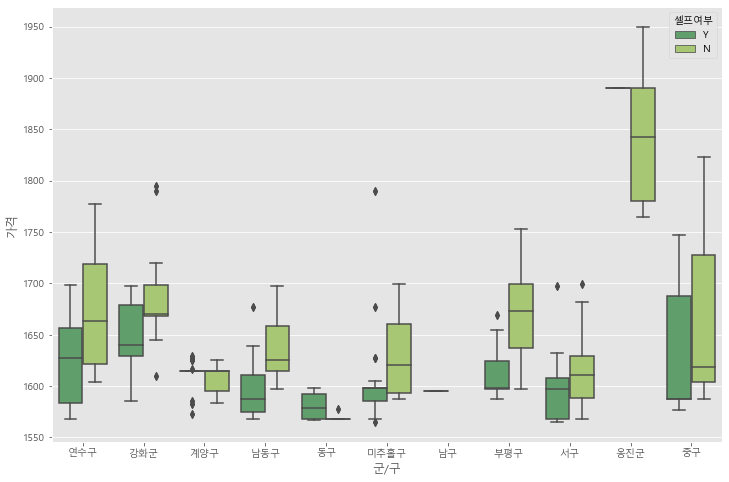

In [45]:
import seaborn as sns

plt.figure(figsize=(12,8))
sns.boxplot(x='군/구',y="가격",hue='셀프여부',data = stations_sel,palette="summer")
plt.show()